In [3]:
#plot auroc
# Function used to import and rename columns from the external prediction text files:
import numpy as np
dict_pred = {'NAMP': 0, 'AMP':1}

def import_and_rename(file, method):
    df = pd.read_csv(file, sep='\s+', header=None)
    
    if method == 'ANN':
        df = df.rename(columns={0: "id_ref", 1: "AMP_Pred", 2: "Probability"})
    else:
        df = df.rename(columns={0: "id_ref", 1: "AMP_Pred", 2: "Probability"})
    
    # Mapping dictionary of boolean value to Prediction column:
    df['AMP_Pred'] = df['AMP_Pred'].map(dict_pred)
    
    return df
import pandas as pd
camp_ANN = import_and_rename('../Predictions/INDEP/CAMP/CAMP_ANN.txt', 'ANN')
camp_DA = import_and_rename('../Predictions/INDEP/CAMP/CAMP_DA.txt', 'DA')
camp_RF = import_and_rename('../Predictions/INDEP/CAMP/CAMP_RF.txt', 'RF')
camp_SVM = import_and_rename('../Predictions/INDEP/CAMP/CAMP_SVM.txt', 'SVM')
# camp_ANN.head()
camp_ANN_label = np.array(camp_ANN['Probability'])
camp_DA_label = np.array(camp_DA['Probability'])
camp_RF_label = np.array(camp_RF['Probability'])
camp_SVM_label = np.array(camp_SVM['Probability'])

AmPEP = pd.read_csv("../Predictions/INDEP/AmPEP_results.csv")
AmPEP.head()
AmPEP_label = np.array(AmPEP['probability_AMP'])

veltriPred = pd.read_csv("../Predictions/INDEP/veltri.csv")
dict_pred_velt = {'Non-AMP': 0, 'AMP':1}
veltriPred['Prediction_Class'] = veltriPred['Prediction_Class'].map(dict_pred_velt)
veltriPred.head()
veltriPred_label = np.array(veltriPred['Prediction_Probability'])

LMPred_BERT =  np.load('../Predictions/INDEP/INDEP_BERT_Model_Preds.npy')
LMPred_BERT_BFD =  np.load('../Predictions/INDEP/INDEP_BERT_BFD_Model_Preds.npy')
LMPred_T5XL_UNI =  np.load('../Predictions/INDEP/INDEP_T5XL_UNI_Model_Preds.npy')
LMPred_T5XL_BFD =  np.load('../Predictions/INDEP/INDEP_T5XL_BFD_Model_Preds.npy')
LMPred_XLNET =  np.load('../Predictions/INDEP/INDEP_XLNET_Model_Preds.npy')
LMPred_BERT[:5]

real = pd.read_csv('../dataset/plant_test.csv')
real_label = np.array(real.Label)
real.head()

PTCLPAMP_label = np.load('../Predictions/INDEP/INDEP_PTCLPAMP_lam1.0_Preds.npy').reshape(-1)

In [3]:
AmPEP = pd.read_csv("../Predictions/INDEP/AmPEP_results.csv")
AmPEP.head()
AmPEP_label = np.array(AmPEP['probability_AMP'])

In [4]:
veltriPred = pd.read_csv("../Predictions/INDEP/veltri.csv")
dict_pred_velt = {'Non-AMP': 0, 'AMP':1}
veltriPred['Prediction_Class'] = veltriPred['Prediction_Class'].map(dict_pred_velt)
veltriPred.head()
veltriPred_label = np.array(veltriPred['Prediction_Probability'])

In [5]:
LMPred_BERT =  np.load('../Predictions/INDEP/INDEP_BERT_Model_Preds.npy')
LMPred_BERT_BFD =  np.load('../Predictions/INDEP/INDEP_BERT_BFD_Model_Preds.npy')
LMPred_T5XL_UNI =  np.load('../Predictions/INDEP/INDEP_T5XL_UNI_Model_Preds.npy')
LMPred_T5XL_BFD =  np.load('../Predictions/INDEP/INDEP_T5XL_BFD_Model_Preds.npy')
LMPred_XLNET =  np.load('../Predictions/INDEP/INDEP_XLNET_Model_Preds.npy')
LMPred_BERT[:5]

array([[9.4281993e-04],
       [8.7685225e-04],
       [4.8044610e-01],
       [2.9354671e-02],
       [1.4060705e-05]], dtype=float32)

In [6]:
real = pd.read_csv('../dataset/plant_test.csv')
real_label = np.array(real.Label)
real.head()

,Length,Sequence,Label
0,115,MEEKWKLSKKDTTASSSSSKSKFSRSFSTSASSTKSPIFVRSSSTK...,0
1,97,MSLHRDSMVPVNSRLENMDSPILSKICAWGVMLGLFALSLFAMAYA...,0
2,13,VLPLISMALGKLL,1
3,105,MSAHWTFKTKELEDQVENQRRIDQELKKKVLKLEFCLRETRIQTRK...,0
4,131,MAIFGKLTKLKSAIKKWPSLTKNHHSTMCTASTAVSEVSKCEDLHV...,0


In [7]:
PTCLPAMP_label = np.load('../Predictions/INDEP/INDEP_PTCLPAMP_lam1.0_Preds.npy').reshape(-1)

In [4]:
def calculate_misclassification_percentage(predicted_labels, actual_labels, peptide_sequences):
    # 定义肽长度范围
    length_ranges = {
        "[10, 50]": (10, 50),
        "[51, 100]": (51, 100),
        "[101, 150]": (101, 150),
        "[151, 200]": (151, 200),
    }
    
    # 将预测的概率转换为标签
    predicted_labels = [1 if pred >= 0.5 else 0 for pred in predicted_labels]
    
    # 初始化统计字典
    misclassified_positive_counts = {key: 0 for key in length_ranges}
    misclassified_negative_counts = {key: 0 for key in length_ranges}
    total_positive_counts = {key: 0 for key in length_ranges}
    total_negative_counts = {key: 0 for key in length_ranges}
    
    # 统计每个肽长度范围内的误分类数量和总数
    for predicted_label, actual_label, peptide_sequence in zip(predicted_labels, actual_labels, peptide_sequences):
        peptide_length = len(peptide_sequence)
        for range_key, (min_length, max_length) in length_ranges.items():
            if min_length <= peptide_length <= max_length:
                if actual_label == 1:
                    total_positive_counts[range_key] += 1
                    if predicted_label != actual_label:
                        misclassified_positive_counts[range_key] += 1
                else:
                    total_negative_counts[range_key] += 1
                    if predicted_label != actual_label:
                        misclassified_negative_counts[range_key] += 1
                break
    
    # 计算误分类概率
    misclassified_positive_percentages = []
    misclassified_negative_percentages = []
    
    for range_key in length_ranges:
        if total_positive_counts[range_key] > 0:
            misclassified_positive_percentages.append(
                (misclassified_positive_counts[range_key] / total_positive_counts[range_key]) * 100
            )
        else:
            misclassified_positive_percentages.append(0.0)
        
        if total_negative_counts[range_key] > 0:
            misclassified_negative_percentages.append(
                (misclassified_negative_counts[range_key] / total_negative_counts[range_key]) * 100
            )
        else:
            misclassified_negative_percentages.append(0.0)
    
    return misclassified_positive_percentages, misclassified_negative_percentages


In [5]:
real_label
sequences = real.Sequence

camp_ANN_mis_AMP,camp_ANN_mis_NonAMP = calculate_misclassification_percentage(camp_ANN_label, real_label, sequences)
camp_DA_mis_AMP, camp_DA_mis_NonAMP =calculate_misclassification_percentage(camp_DA_label, real_label, sequences)
camp_RF_mis_AMP, camp_RF_mis_NonAMP = calculate_misclassification_percentage(camp_RF_label, real_label, sequences)
camp_SVM_mis_AMP, camp_SVM_mis_NonAMP = calculate_misclassification_percentage(camp_SVM_label, real_label, sequences)
AmPEP_mis_AMP, AmPEP_mis_NonAMP = calculate_misclassification_percentage(AmPEP_label, real_label, sequences)
veltriPred_mis_AMP, veltriPred_mis_NonAMP = calculate_misclassification_percentage(veltriPred_label, real_label, sequences)
LMPred_BERT_mis_AMP, LMPred_BERT_mis_NonAMP = calculate_misclassification_percentage(LMPred_BERT, real_label, sequences)
LMPred_BERT_BFD_mis_AMP, LMPred_BERT_BFD_mis_NonAMP = calculate_misclassification_percentage(LMPred_BERT_BFD, real_label, sequences)
LMPred_T5XL_UNI_mis_AMP, LMPred_T5XL_UNI_mis_NonAMP = calculate_misclassification_percentage(LMPred_T5XL_UNI, real_label, sequences)
LMPred_T5XL_BFD_mis_AMP, LMPred_T5XL_BFD_mis_NonAMP = calculate_misclassification_percentage(LMPred_T5XL_BFD, real_label, sequences)
LMPred_XLNET_mis_AMP, LMPred_XLNET_mis_NonAMP = calculate_misclassification_percentage(LMPred_XLNET, real_label, sequences)
PTCLPAMP_label_mis_AMP,PTCLPAMP_label_mis_NonAMP = calculate_misclassification_percentage(PTCLPAMP_label, real_label, sequences)


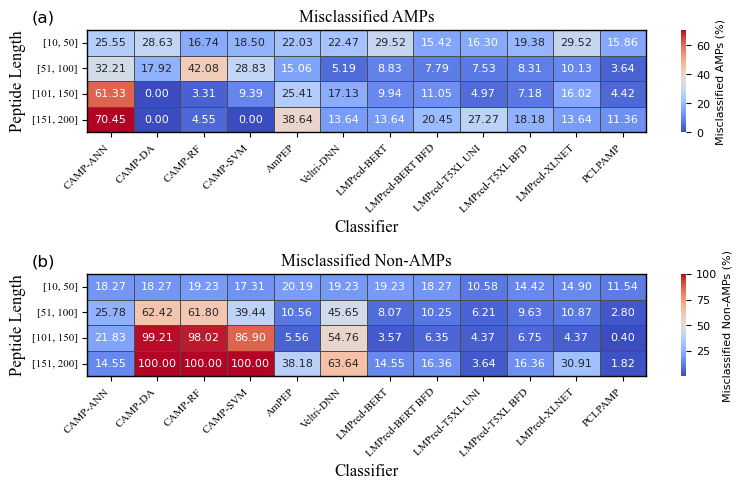

In [22]:
#有颜色的错误分类图
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# plt.rcParams['font.sans-serif'] = ['SimSun']  # 设置中文字体为宋体
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 8
plt.rcParams['axes.unicode_minus'] = False   # 解决负号无法正常显示的问题

# 创建DataFrame
data_AMP = {
    "Peptide Length": ["[10, 50]", "[51, 100]", "[101, 150]", "[151, 200]"],
    "CAMP-ANN": camp_ANN_mis_AMP,
    "CAMP-DA": camp_DA_mis_AMP,
    "CAMP-RF": camp_RF_mis_AMP,
    "CAMP-SVM": camp_SVM_mis_AMP,
    "AmPEP": AmPEP_mis_AMP,
    "Veltri-DNN": veltriPred_mis_AMP,
    "LMPred-BERT": LMPred_BERT_mis_AMP,
    "LMPred-BERT BFD": LMPred_BERT_BFD_mis_AMP,
    "LMPred-T5XL UNI": LMPred_T5XL_UNI_mis_AMP,
    "LMPred-T5XL BFD": LMPred_T5XL_BFD_mis_AMP,
    "LMPred-XLNET": LMPred_XLNET_mis_AMP,
    "PCLPAMP": PTCLPAMP_label_mis_AMP,
}

data_NonAMP = {
    "Peptide Length": ["[10, 50]", "[51, 100]", "[101, 150]", "[151, 200]"],
    "CAMP-ANN": camp_ANN_mis_NonAMP,
    "CAMP-DA": camp_DA_mis_NonAMP,
    "CAMP-RF": camp_RF_mis_NonAMP,
    "CAMP-SVM": camp_SVM_mis_NonAMP,
    "AmPEP": AmPEP_mis_NonAMP,
    "Veltri-DNN": veltriPred_mis_NonAMP,
    "LMPred-BERT": LMPred_BERT_mis_NonAMP,
    "LMPred-BERT BFD": LMPred_BERT_BFD_mis_NonAMP,
    "LMPred-T5XL UNI": LMPred_T5XL_UNI_mis_NonAMP,
    "LMPred-T5XL BFD": LMPred_T5XL_BFD_mis_NonAMP,
    "LMPred-XLNET": LMPred_XLNET_mis_NonAMP,
    "PCLPAMP": PTCLPAMP_label_mis_NonAMP,
}

# 转换为DataFrame
df_AMP = pd.DataFrame(data_AMP)
df_NonAMP = pd.DataFrame(data_NonAMP)

# 设置Peptide Length为索引
df_AMP = df_AMP.set_index("Peptide Length")
df_NonAMP = df_NonAMP.set_index("Peptide Length")

# 创建子图
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# 绘制第一个热图
sns.heatmap(df_AMP, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.6, linecolor='#4d4d4d',
            cbar_kws={'label': 'Misclassified AMPs (%)'}, annot_kws={"size": 8}, ax=axs[0])

# 绘制第二个热图
sns.heatmap(df_NonAMP, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.6, linecolor='#4d4d4d',
            cbar_kws={'label': 'Misclassified Non-AMPs (%)'}, annot_kws={"size": 8}, ax=axs[1])

# 设置外框
for ax in axs:
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)

# 设置标签和标题
axs[0].set_xlabel('Classifier', fontsize=12, fontname='Times New Roman')
axs[0].set_ylabel('Peptide Length', fontsize=12, fontname='Times New Roman')
axs[0].set_title('Misclassified AMPs', fontsize=12, fontname='Times New Roman')

axs[1].set_xlabel('Classifier', fontsize=12, fontname='Times New Roman')
axs[1].set_ylabel('Peptide Length', fontsize=12, fontname='Times New Roman')
axs[1].set_title('Misclassified Non-AMPs', fontsize=12, fontname='Times New Roman')

# 设置刻度字体
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8, fontname='Times New Roman')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8, fontname='Times New Roman')
    ax.yaxis.set_tick_params(labelsize=8)

# 添加子图标记
axs[0].text(-0.1, 1.08, '(a)', transform=axs[0].transAxes, size=12)
axs[1].text(-0.1, 1.08, '(b)', transform=axs[1].transAxes, size=12)

plt.tight_layout()
plt.savefig('../Figures/INDEP/color_english/Combined_PeptideLengths_For_Two.svg', bbox_inches='tight', dpi=1200)
plt.show()